## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
import random
from sklearn.metrics import accuracy_score
import scipy.ndimage
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [ ]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). The helper function 'show_data()' visualizes each given observation.

In [ ]:
def show_data(X, Y, n, angle=0):
    image_matrix = X[n,:].reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    print(Y[n])

3


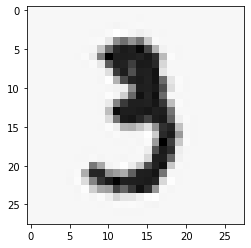

In [ ]:
# Example 1.
show_data(X_train, Y_train,10,+10)

3


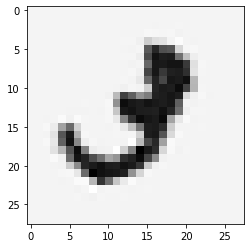

In [ ]:
# Example 2.
show_data(X_train, Y_train,10,-30)

1


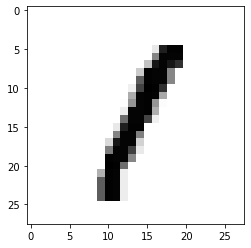

In [ ]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = RandomForestClassifier(n_estimators = 80)  
clf.fit(X_train, Y_train)  
y_pred = clf.predict(X_test)  
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.67


3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [ ]:
X_train.shape

(100, 784)

In [ ]:
Y_train.shape

(100,)

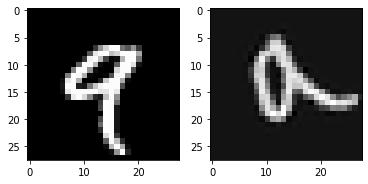

In [ ]:
random.seed(1)

rot_imgs = X_train.copy()
for img in rot_imgs:
    img[:] = scipy.ndimage.interpolation.rotate(np.reshape(img,(28,28)),
                                                random.randint(1,360),reshape=False,mode="nearest").ravel()
index = np.random.randint(1,50)

plt.subplot(121)
plt.imshow(np.reshape(imgs[index],(28,28)),cmap="gray")
plt.subplot(122)
plt.imshow(np.reshape(rot_imgs[index],(28,28)),cmap="gray")

In [ ]:
rot_imgs.shape

(100, 784)

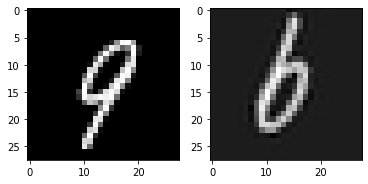

In [ ]:
random.seed(1)

rot_imgs_Y = Y_train.copy()
for img in rot_imgs:
    img[:] = scipy.ndimage.interpolation.rotate(np.reshape(img,(28,28)),
                                                random.randint(1,360),reshape=False,mode="nearest").ravel()
index = np.random.randint(1,50)

plt.subplot(121)
plt.imshow(np.reshape(imgs[index],(28,28)),cmap="gray")
plt.subplot(122)
plt.imshow(np.reshape(rot_imgs[index],(28,28)),cmap="gray")

In [ ]:
rot_imgs_Y.shape

(100,)

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [ ]:
X_aug = np.concatenate([X_train, rot_imgs])
X_aug.shape

(200, 784)

In [ ]:
Y_aug = np.concatenate([Y_train, rot_imgs_Y])
Y_aug.shape

(200,)

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [ ]:
clf = RandomForestClassifier(n_estimators = 80)  
clf.fit(X_aug, Y_aug)  
y_pred = clf.predict(X_test)  
print("Accuracy:", accuracy_score(Y_test, y_pred))

Accuracy: 0.65


The accuracy has decreased